In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BPCL/Coke_pred.csv") 

In [4]:
df2.describe()

,React_temp,MAB_Air,Steam,cat_cir,coke
count,8735.000000,8737.000000,8737.00000,8737.000000,8737.000000
mean,500.997312,1954.172476,34.46796,12.158553,117.853609
std,35.933103,497.425300,10.59031,9.465481,39.774385
min,397.395000,0.000000,0.00000,-21.615400,-34.446900
25%,507.279500,1970.290000,30.02910,11.928800,118.062000
50%,512.836000,2064.910000,35.09350,13.434400,123.953000
75%,517.661500,2150.920000,40.11040,14.319900,135.817000
max,547.066000,2529.970000,57.85410,755.262000,177.455000


In [5]:
df2.isna().sum()

React_temp     25
MAB_Air        23
Steam          23
cat_cir        23
coke           23
dtype: int64

In [6]:
df2.head()

,React_temp,MAB_Air,Steam,cat_cir,coke
0,513.459,2145.18,38.0698,14.5919,155.896
1,514.502,2149.35,37.9361,14.6886,156.237
2,514.519,2141.80,37.9040,14.6710,155.690
3,513.988,2119.96,38.0746,14.6519,154.014
4,513.904,2120.71,38.0290,14.7717,154.035


In [7]:
df2['React_temp '].fillna(value=df2['React_temp '].mean(), inplace=True)
df2['MAB_Air'].fillna(value=df2['MAB_Air'].mean(), inplace=True)
df2['Steam'].fillna(value=df2['Steam'].mean(), inplace=True)
df2['cat_cir'].fillna(value=df2['cat_cir'].mean(), inplace=True)
df2['coke'].fillna(value=df2['coke'].mean(), inplace=True)

In [8]:
df2.columns

Index(['React_temp ', 'MAB_Air', 'Steam', 'cat_cir', 'coke'], dtype='object')

In [9]:
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

In [10]:
df2.shape

(8760, 5)

In [11]:
df = df2.drop_duplicates(keep=False)

In [12]:
df.shape

(8711, 5)

In [13]:
df.describe()

,React_temp,MAB_Air,Steam,cat_cir,coke
count,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000
mean,501.306453,1960.005157,34.570837,12.194843,118.205370
std,35.533470,486.556404,10.437072,9.456224,39.308259
min,397.395000,0.000000,0.000000,-21.615400,-34.446900
25%,507.327500,1970.470000,30.030950,11.947150,118.094000
50%,512.870000,2065.560000,35.103800,13.445200,123.992000
75%,517.674000,2150.995000,40.113250,14.321450,135.886500
max,547.066000,2529.970000,57.854100,755.262000,177.455000


## Data analysis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


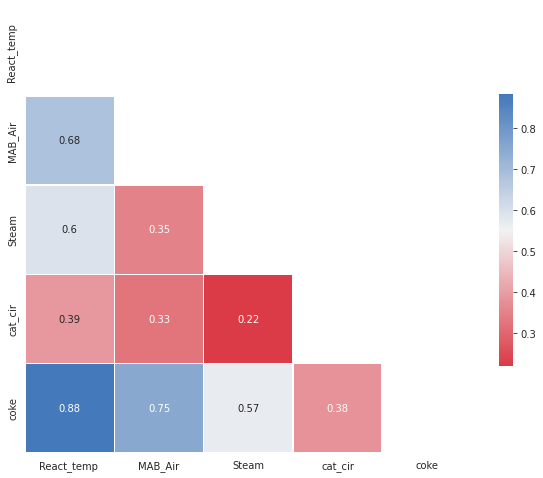

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

corr = df.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax,annot=True)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TARP/heatmap',bbox_inches='tight', dpi=300)

In [15]:
X = df[["React_temp ","MAB_Air","Steam","cat_cir"]]
y=df[["coke"]]



In [16]:
df.isna().sum()

React_temp     0
MAB_Air        0
Steam          0
cat_cir        0
coke           0
dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Splitting the data randomly 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

print(np.shape(X_train))
print(np.shape(y_test))
print(df.head())

(6968, 4)
(1743, 1)
   React_temp   MAB_Air    Steam  cat_cir     coke
0      513.459  2145.18  38.0698  14.5919  155.896
1      514.502  2149.35  37.9361  14.6886  156.237
2      514.519  2141.80  37.9040  14.6710  155.690
3      513.988  2119.96  38.0746  14.6519  154.014
4      513.904  2120.71  38.0290  14.7717  154.035


## SVR

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

from sklearn.model_selection import validation_curve

from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [19]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('rbf','sigmoid'), 'C':range(1,15)}
SVR = SVR()
clf = GridSearchCV(SVR, param_grid=parameters,cv=3)
clf.fit(X_train, y_train)
clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 14, 'kernel': 'rbf'}

In [20]:
clf.best_score_

0.8992590029244849

In [21]:
SVM_Score=clf.best_score_

In [22]:
from sklearn.svm import SVR
clf1=SVR(kernel=clf.best_params_['kernel'],C=clf.best_params_['C'],gamma="auto")
clf1.fit(X_train,y_train)
svr_pred =clf1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, svr_pred)

0.8733244617789628

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:


print("Mean squared error:") 
print(mean_squared_error(y_test, clf1.predict(X_test)))

print('Variance score: ' ) # Explained variance score: 1 is perfect prediction
print(clf1.score(X_test, y_test))
svr_varr=clf1.score(X_test, y_test)

svr_r=mean_squared_error(y_test, clf1.predict(X_test))

Mean squared error:
0.12358205329246806
Variance score: 
0.8733244617789628


In [27]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(clf1,X_train,y_train,cv=10)
scores

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.90961821, 0.86812187, 0.89393261, 0.91384947, 0.87799693,
       0.90979626, 0.89254218, 0.90344561, 0.92074484, 0.88878815])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
def evauation_model(pred, y_val):
  score_MSE = round(mean_squared_error(pred, y_val),2)
  score_MAE = round(mean_absolute_error(pred, y_val),2)
  score_r2score = round(r2_score(pred, y_val),2)
  return score_MSE, score_MAE, score_r2score
def models_score(model_name, train_data, y_train, val_data,y_val):
    model_list = ["Decision_Tree","Random_Forest","XGboost_Regressor"]
    #model_1
    if model_name=="Decision_Tree":
        reg = DecisionTreeRegressor(random_state=42)
    #model_2
    elif model_name=="Random_Forest":
      reg = RandomForestRegressor(random_state=42)
        
    #model_3
    elif model_name=="XGboost_Regressor":
        reg = xgb.XGBRegressor(objective="reg:squarederror",random_state=42,)
    else:
        print("please enter correct regressor name")
        
    if model_name in model_list:
        reg.fit(train_data,y_train)
        pred = reg.predict(val_data)
     
        score_MSE, score_MAE, score_r2score = evauation_model(pred,y_val)
        return round(score_MSE,2), round(score_MAE,2), round(score_r2score,2)
model_list = ["Decision_Tree","Random_Forest","XGboost_Regressor"]
result_scores = []
for model in model_list:
    score = models_score(model, X_train, y_train, X_test, y_test)
    result_scores.append((model, score[0], score[1],score[2]))
    print(model,score)

Decision_Tree (0.04, 0.08, 0.96)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random_Forest (0.03, 0.08, 0.97)
XGboost_Regressor (0.07, 0.19, 0.92)


In [30]:
df_result_scores = pd.DataFrame(result_scores,columns=["model","mse","mae","r2score"])
df_result_scores

,model,mse,mae,r2score
0,Decision_Tree,0.04,0.08,0.96
1,Random_Forest,0.03,0.08,0.97
2,XGboost_Regressor,0.07,0.19,0.92


### Random Forest 

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rand=RandomForestRegressor()
rand_par = {'n_estimators':[5,10,5025,100,200, 350, 500], 'min_samples_leaf':[2, 4,8,16,32]}
grid_randf = GridSearchCV(rand, param_grid=rand_par, cv=3)
grid_randf.fit(X_train, y_train)
grid_randf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

{'min_samples_leaf': 2, 'n_estimators': 350}

In [102]:
rf1=RandomForestRegressor(min_samples_leaf=grid_randf.best_params_['min_samples_leaf'], n_estimators=grid_randf.best_params_['n_estimators'],max_depth= 5000)
# fit
rf1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=5000, min_samples_leaf=2, n_estimators=350)

In [103]:
rf_pred =rf1.predict(X_test)

In [104]:
print("Mean squared error:") 
print(mean_squared_error(y_test, rf1.predict(X_test)))

print('Variance score: ' ) # Explained variance score: 1 is perfect prediction
print(rf1.score(X_test, y_test))
rf_varr=rf1.score(X_test, y_test)

Mean squared error:
0.027191701015407646
Variance score: 
0.9721276409518742


### OUTPUT

In [105]:
P=[[502, 2230, 46, 15.6]]#"React_temp ","MAB_Air","Steam","cat_cir"
P = scalerX.transform(P)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [106]:
P

array([[0.02158702, 0.55835545, 1.0906576 , 0.34453892]])

In [107]:
Output=rf1.predict(P)

In [108]:
Output

array([0.36087809])

In [109]:
y_new_inverse = scalery.inverse_transform([[0.36087809]])
y_new_inverse

array([[132.25640758]])

In [110]:
y_test

array([[ 0.44457131],
       [ 0.12622873],
       [ 0.10143238],
       ...,
       [-0.6258115 ],
       [ 0.14869012],
       [ 0.0668393 ]])

In [111]:
rf_pred

array([ 0.43010034,  0.60475014,  0.10260403, ..., -1.69818229,
        0.36730096,  0.08739088])